In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("D:/File/Dataset/Superstore.xlsx")

In [3]:
df1=df.copy()

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.drop("Row ID",axis=1).head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [7]:
df=pd.DataFrame(df)

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9982.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2019-04-30 17:41:20.448268800,2019-05-04 16:42:15.921553152,55241.748347,229.858001,3.789574,0.156203,28.656896
min,1.000000,2017-01-03 00:00:00,2017-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2018-05-23 00:00:00,2018-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2019-06-26 00:00:00,2019-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2020-05-14 00:00:00,2020-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2020-12-30 00:00:00,2021-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.428629,623.245101,2.225110,0.206452,234.260108


In [9]:
df.groupby("Customer ID").agg(sum_of_profit=("Profit","sum")).reset_index

<bound method DataFrame.reset_index of              sum_of_profit
Customer ID               
AA-10315         -362.8825
AA-10375          277.3824
AA-10480          435.8274
AA-10645          857.8033
AB-10015          129.3465
...                    ...
XP-21865          621.2300
YC-21895         1305.6290
YS-21880         1778.2923
ZC-21910        -1032.1490
ZD-21925          249.1307

[793 rows x 1 columns]>

Xếp hạng lợi nhuận của từng khách hàng 

In [10]:
df_agg=df.groupby("Customer ID").agg (sum_profit=("Profit","sum"))
df_agg["Ranking"]=df_agg["sum_profit"].rank(method="min", ascending=False).astype(int)
df_agg.sort_values("Ranking").head(10)

,sum_profit,Ranking
Customer ID,,
TC-20980,8981.3239,1
RB-19360,6976.0959,2
SC-20095,5757.4119,3
HL-15040,5622.4292,4
AB-10105,5444.8055,5
TA-21385,4703.7883,6
CM-12385,3899.8904,7
KD-16495,3038.6254,8
AR-10540,2884.6208,9


In [11]:
df.isnull.any()

AttributeError: 'function' object has no attribute 'any'

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
print(set(df["Discount"]))

{0.0, 0.8, 0.2, 0.3, 0.45, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15}


In [ ]:
len(df["Customer ID"].unique())

793

In [ ]:
(
    df.groupby("Product ID")
    .agg(
        
           sum_quantity = ( "Quantity", "sum") , 
           sum_profit =("Profit","sum")
        
    ).reset_index()
).head(10)

,Product ID,sum_quantity,sum_profit
0,FUR-BO-10000112,9,-117.8820
1,FUR-BO-10000330,10,24.1960
2,FUR-BO-10000362,14,311.1836
3,FUR-BO-10000468,21,-133.1092
4,FUR-BO-10000711,12,229.9752
5,FUR-BO-10000780,22,-767.7436
6,FUR-BO-10001337,28,-78.6370
7,FUR-BO-10001519,22,147.0942
8,FUR-BO-10001567,3,-190.8522
9,FUR-BO-10001601,10,-125.7408


In [ ]:
df.groupby("Customer ID")["Order Date"].min().reset_index().head()

,Customer ID,Order Date
0,AA-10315,2017-03-31
1,AA-10375,2017-04-21
2,AA-10480,2017-05-04
3,AA-10645,2017-06-22
4,AB-10015,2017-02-18


In [ ]:
df.groupby("Customer ID")["Order Date"].max().reset_index().head()

,Customer ID,Order Date
0,AA-10315,2020-06-29
1,AA-10375,2020-12-11
2,AA-10480,2020-04-15
3,AA-10645,2020-11-05
4,AB-10015,2019-11-10


In [ ]:
df_tmp=df.groupby("Customer ID").agg({"Order Date" : ["min", "max"]}).reset_index()
df_tmp

Customer ID Order Date           
                       min        max
0      AA-10315 2017-03-31 2020-06-29
1      AA-10375 2017-04-21 2020-12-11
2      AA-10480 2017-05-04 2020-04-15
3      AA-10645 2017-06-22 2020-11-05
4      AB-10015 2017-02-18 2019-11-10
..          ...        ...        ...
788    XP-21865 2017-01-20 2020-11-17
789    YC-21895 2017-11-17 2020-12-26
790    YS-21880 2018-01-12 2020-12-21
791    ZC-21910 2017-10-13 2020-11-06
792    ZD-21925 2017-08-27 2020-06-11

[793 rows x 3 columns]

In [ ]:
# P-026

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,523.92
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2195.82


In [ ]:
print(set(df["Sub-Category"]))

{'Furnishings', 'Paper', 'Copiers', 'Chairs', 'Phones', 'Labels', 'Envelopes', 'Tables', 'Machines', 'Bookcases', 'Supplies', 'Accessories', 'Art', 'Appliances', 'Fasteners', 'Binders', 'Storage'}


In [ ]:
df["Revenue"]=df["Sales"]*df["Quantity"]*(1-df["Discount"])

In [ ]:
cost=df["Revenue"]-df["Profit"]
cost

0        482.006400
1       1976.238000
2         22.368600
3       3016.369125
4         33.272400
           ...     
9989      56.492400
9990     168.286800
9991     394.328400
9992     105.080000
9993     413.372000
Length: 9994, dtype: float64

In [ ]:
profit_percent =round((df["Profit"]/cost)*100,2).astype(str)+"%"
profit_percent

0         8.7%
1       11.11%
2       30.72%
3       -12.7%
4        7.56%
         ...  
9989     7.26%
9990     9.29%
9991     4.92%
9992    12.68%
9993    17.65%
Length: 9994, dtype: object

In [ ]:
profit_percent.sort_values( ascending=False)

7158    96.08%
3589    96.08%
4640    96.08%
6697    96.08%
3646    96.08%
         ...  
2769    -0.18%
2844    -0.18%
4543    -0.16%
167     -0.16%
6535    -0.12%
Length: 9994, dtype: object

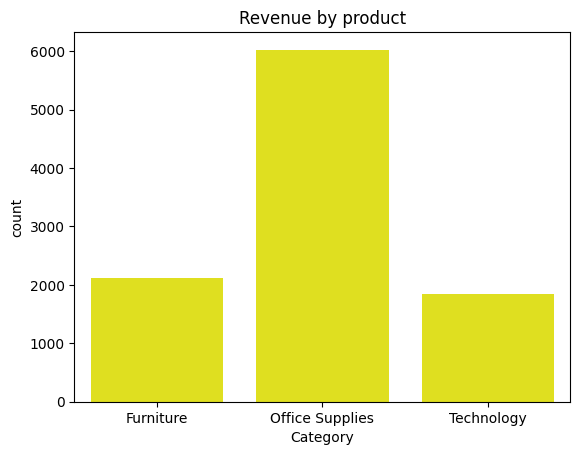

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x="Category", data=df, color="yellow")
plt.title("Revenue by product")
plt.show()

Text(0.5, 1.0, ' total revenue and profit by category')

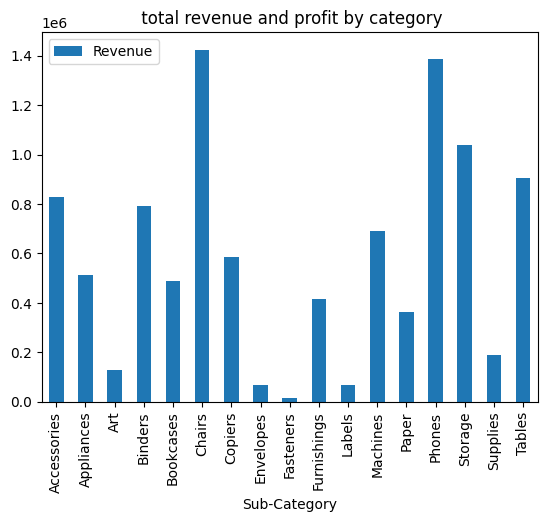

In [ ]:
df.groupby("Sub-Category")[["Revenue"]].sum().plot(kind="bar")
plt.title(" total revenue and profit by category")

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,delivery_time
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,523.92,3 days
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2195.82,3 days


Doanh số từng danh mục sản phẩm 

In [ ]:
sale_value_sub_category=df.groupby('Sub-Category')['Sales'].sum()
sale_value_sub_category

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [ ]:
sub_cat=[cate for cate, sales in sale_value_sub_category.items()]
print(sub_cat)

['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']


In [ ]:
df.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11


In [ ]:
print(set(df["Order Month"]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9982 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [ ]:
df['Order Month'] = df['Order Date'].dt.month

Kiểm tra bất thường dữ liệu 

In [ ]:
df['Sales_Zscore'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()
df["Profit_Zscore"] = (df['Profit'] - df['Profit'].mean()) / df['Profit'].std()

outlier=df[(df['Sales_Zscore'].abs() > 3) | (df['Profit_Zscore'].abs() > 3)]
print(f" số lượng outlier là :{len(outlier)}")
print(f"top 5 đơn hàng có lợi nhuận bất thường")
print(outlier[["Order ID","Customer Name","Sales","Profit"]].sort_values(by="Profit").head())

 số lượng outlier là :165
top 5 đơn hàng có lợi nhuận bất thường
            Order ID   Customer Name     Sales     Profit
7772  CA-2019-108196   Cindy Stewart  4499.985 -6599.9780
683   US-2020-168116  Grant Thornton  7999.980 -3839.9904
9774  CA-2017-169019     Luke Foster  2177.584 -3701.8928
3011  CA-2020-134845  Sharelle Roach  2549.985 -3399.9800
4991  US-2020-122714   Henry Goldwyn  1889.990 -2929.4845


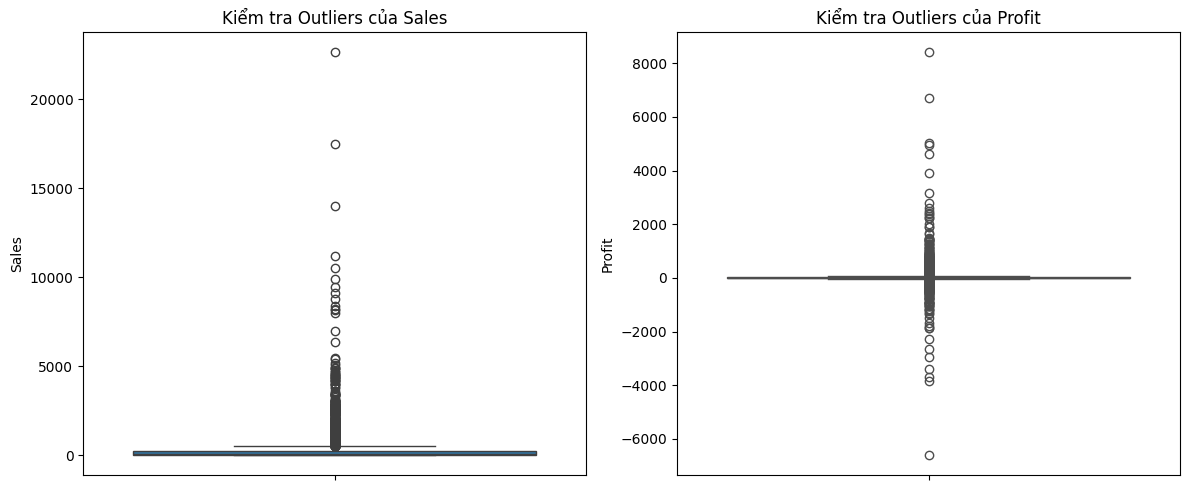

In [ ]:
plt.figure(figsize=(12, 5))

# Biểu đồ hộp cho Sales
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title('Kiểm tra Outliers của Sales')

# Biểu đồ hộp cho Profit
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'], color='orange')
plt.title('Kiểm tra Outliers của Profit')

plt.tight_layout()
plt.show()


Kiểm tra dữ liệu có logic bất thường

In [ ]:
date_error=df[df["Ship Date"]<df["Order Date"]]

no_discount_loss=df[(df["Discount"]==0) & (df["Profit"]<0)]

print(f"số đơn hàng sai logic ngày tháng là: {len(date_error)}")
print(f"số đơn hàng không có discount và lỗ là: {len(no_discount_loss)}")

số đơn hàng sai logic ngày tháng là: 0
số đơn hàng không có discount và lỗ là: 0


Phân tích RFM

In [ ]:
snapshot_date=df["Order Date"].max()+pd.DateOffset(days=1)

rfm=df.groupby("Customer ID").agg(
    {
        "Order Date": lambda x:(snapshot_date-x.max()).days,
        "Order ID": "count",
        "Sales": "sum"
    }
)

rfm.columns=["Recency","Frequency","Monetary"]
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]) # Gần hơn thì điểm cao hơn
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# 2. TÍNH CHỈ SỐ LỢI NHUẬN TRÊN MỖI ĐƠN HÀNG (Profit per Order)
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Trực quan hóa những khu vực có biên lợi nhuận thấp nhất để cảnh báo
low_margin_states = df.groupby('State')['Profit_Margin'].mean().sort_values().head(5)
print("Các bang cần kiểm tra lại chính sách giá/vận chuyển:\n", low_margin_states)
print(rfm.query("Recency < 30").head(10))


Các bang cần kiểm tra lại chính sách giá/vận chuyển:
 State
Illinois       -39.167683
Texas          -34.201105
Colorado       -12.375458
Pennsylvania    -8.601302
Ohio            -7.380825
Name: Profit_Margin, dtype: float64
             Recency  Frequency  Monetary R_Score F_Score M_Score
Customer ID                                                      
AA-10375          20         15  1056.390       4       3       1
AB-10165          26         14  1113.838       4       3       1
AC-10450          12          9  5527.846       4       2       4
AC-10615           7         18  2537.686       4       4       3
AG-10330           9          9   660.972       4       2       1
AH-10030          13         11  1744.700       4       2       2
AH-10210           7         13  4805.344       4       3       4
AH-10585          22          5   738.504       4       1       1
AI-10855          14         18  4375.786       4       4       4
AM-10360          29         12   814.012       

In [ ]:
# Tính biên lợi nhuận trung bình (%) cho từng danh mục
category_margin = df.groupby('Category').apply(
    lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100
).reset_index(name='Profit_Margin_%')

print(category_margin)

          Category  Profit_Margin_%
0        Furniture         2.486695
1  Office Supplies        17.035158
2       Technology        17.395712


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2052\3889734116.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_margin = df.groupby('Category').apply(


In [ ]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin,Delivery Duration,Discount Group
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0,3,0%


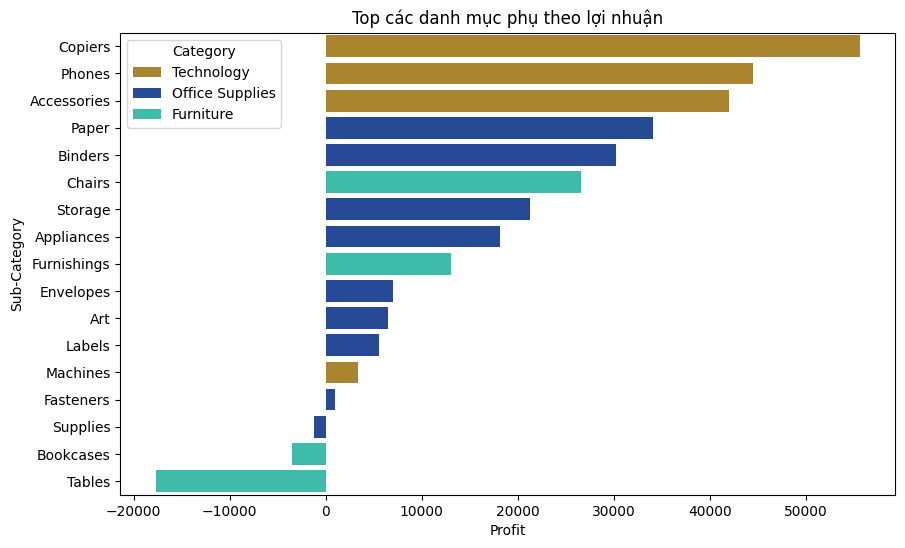

In [ ]:
category_color={
    "Furniture":"#29D1B8",
    "Office Supplies":"#1443AA",
    "Technology":"#BD8D1C"
}

top_win=df.groupby(["Sub-Category","Category"])["Profit"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_win,x="Profit",y="Sub-Category",hue="Category",palette=category_color)
plt.title("Top các danh mục phụ theo lợi nhuận")
plt.show()

In [ ]:
# Lọc 10 đơn hàng lỗ nặng nhất
top_losses = df[df['Profit'] < 0].sort_values(by='Profit').head(10)
print(top_losses[['Category', 'Sub-Category', 'Sales', 'Profit', 'Discount']])

             Category Sub-Category      Sales     Profit  Discount
7772       Technology     Machines   4499.985 -6599.9780       0.7
683        Technology     Machines   7999.980 -3839.9904       0.5
9774  Office Supplies      Binders   2177.584 -3701.8928       0.8
3011       Technology     Machines   2549.985 -3399.9800       0.7
4991  Office Supplies      Binders   1889.990 -2929.4845       0.8
3151       Technology     Machines   1799.994 -2639.9912       0.7
5310  Office Supplies      Binders   1525.188 -2287.7820       0.8
9639        Furniture       Tables   4297.644 -1862.3124       0.4
1199  Office Supplies      Binders   1088.792 -1850.9464       0.8
2697       Technology     Machines  22638.480 -1811.0784       0.5


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2052\437626750.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=furniture_discount_impact, x='Discount', y='Profit', palette='Reds_r')


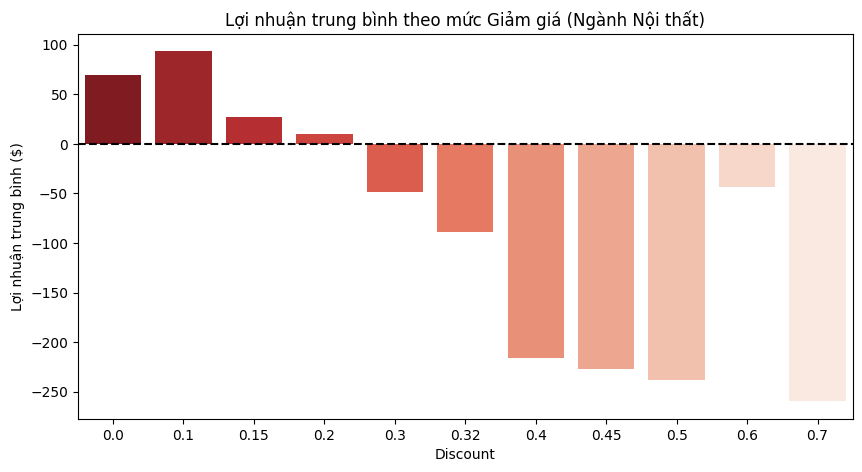

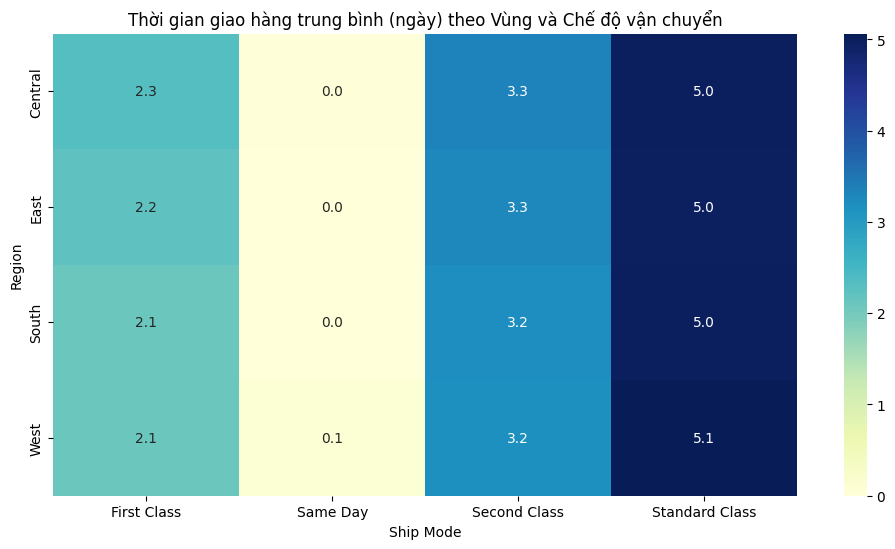

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2052\437626750.py:45: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_analysis = df.groupby('Discount Group').apply(lambda x: (x['Profit'] < 0).mean() * 100).reset_index(name='Loss Percentage')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2052\437626750.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_analysis, x='Discount Group', y='Loss Percentage', palette='Oranges')


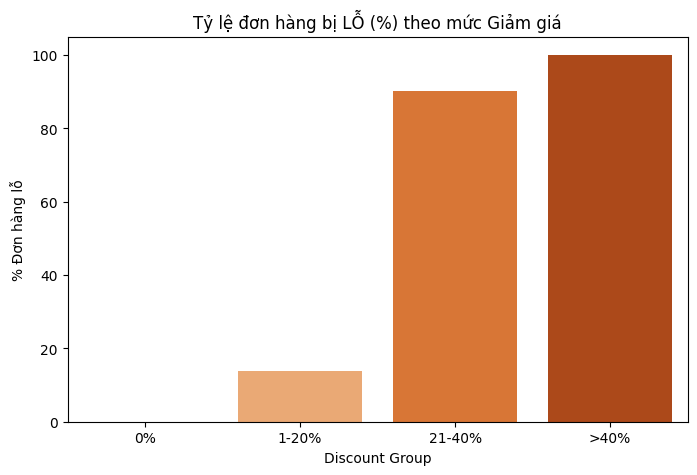

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. CẢNH BÁO ĐỎ: LỢI NHUẬN ÂM TRONG NGÀNH NỘI THẤT (FURNITURE) ---
# Lọc riêng ngành Furniture và nhóm theo Discount để thấy mức độ ảnh hưởng
furniture_df = df[df['Category'] == 'Furniture']
furniture_discount_impact = furniture_df.groupby('Discount')['Profit'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=furniture_discount_impact, x='Discount', y='Profit', palette='Reds_r')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lợi nhuận trung bình theo mức Giảm giá (Ngành Nội thất)')
plt.ylabel('Lợi nhuận trung bình ($)')
plt.show()

# --- 2. TỐI ƯU LOGISTICS: THỜI GIAN GIAO HÀNG (DELIVERY DURATION) ---
# Chuyển đổi định dạng ngày và tính số ngày giao hàng
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Tính trung bình thời gian giao hàng theo từng Vùng (Region) và Chế độ giao hàng (Ship Mode)
logistics_analysis = df.groupby(['Region', 'Ship Mode'])['Delivery Duration'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(logistics_analysis, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Thời gian giao hàng trung bình (ngày) theo Vùng và Chế độ vận chuyển')
plt.show()

# --- 3. TÁC ĐỘNG CỦA DISCOUNT LÊN LỢI NHUẬN TOÀN CỤC ---
# Tạo các nhóm Discount để dễ quan sát
def discount_category(d):
    if d == 0: return '0%'
    if d <= 0.2: return '1-20%'
    if d <= 0.4: return '21-40%'
    return '>40%'

df['Discount Group'] = df['Discount'].apply(discount_category)

# Tính tỷ lệ đơn hàng bị lỗ trong mỗi nhóm giảm giá
loss_analysis = df.groupby('Discount Group').apply(lambda x: (x['Profit'] < 0).mean() * 100).reset_index(name='Loss Percentage')

plt.figure(figsize=(8, 5))
sns.barplot(data=loss_analysis, x='Discount Group', y='Loss Percentage', palette='Oranges')
plt.title('Tỷ lệ đơn hàng bị LỖ (%) theo mức Giảm giá')
plt.ylabel('% Đơn hàng lỗ')
plt.show()

Kết luận:
1. Tại sao Nội thất (Furniture) lại nguy hiểm?
Dựa vào mã trên, bạn sẽ thấy biểu đồ lợi nhuận của Furniture thường rơi xuống mức âm rất nhanh khi Discount > 0.2.

Insight: Chi phí lưu kho và vận chuyển hàng cồng kềnh là cố định. Khi bạn giảm giá, bạn đang cắt trực tiếp vào phần lợi nhuận vốn đã ít ỏi sau khi trừ phí vận chuyển.

Hành động: Kiểm tra lại Ship Mode của các đơn hàng lỗ. Nếu là "Standard Class" mà vẫn lỗ, cần tăng giá niêm yết hoặc giảm mức chiết khấu tối đa cho riêng nhóm này.

2. Nút thắt Logistics theo vùng
Bản đồ nhiệt (Heatmap) sẽ chỉ ra khu vực nào có thời gian giao hàng vượt quá 5-7 ngày.

Insight: Nếu vùng "Central" có thời gian giao hàng trung bình cao hơn hẳn các vùng khác dù cùng một chế độ vận chuyển, chứng tỏ hệ thống kho bãi ở đây đang quá tải hoặc hạ tầng giao thông kết nối kém.

Hành động: Cân nhắc đặt thêm kho trung chuyển (Micro-fulfillment center) tại các thành phố trọng điểm trong vùng đó.

3. Chính sách giảm giá "Vùng an toàn"
Biểu đồ cuối cùng sẽ chứng minh luận điểm: Giảm giá càng cao, tỷ lệ đơn hàng lỗ càng tăng vọt.

Insight: Thông thường, mức giảm giá quanh 15% (0.15) là điểm cân bằng giữa việc kích cầu và duy trì lợi nhuận.

Phân tích xu hướng doanh thu theo thời gian


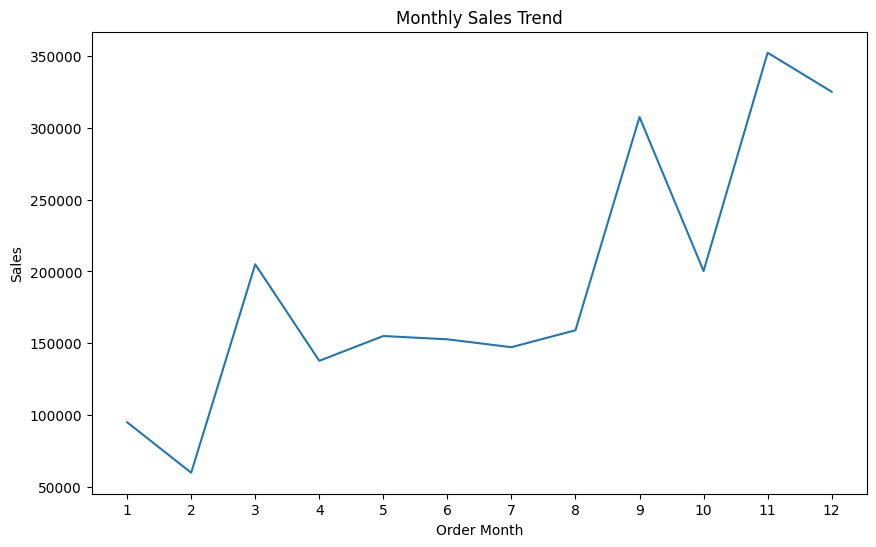

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
month_sales=df.groupby("Order Month")["Sales"].sum().reset_index()
sns.lineplot(data=month_sales,x="Order Month",y="Sales")
plt.title("Monthly Sales Trend")
plt.xticks(month_sales["Order Month"], rotation='horizontal')
plt.show()

10 thành phố có doanh số và lợi nhuận bán hàng cao nhất 

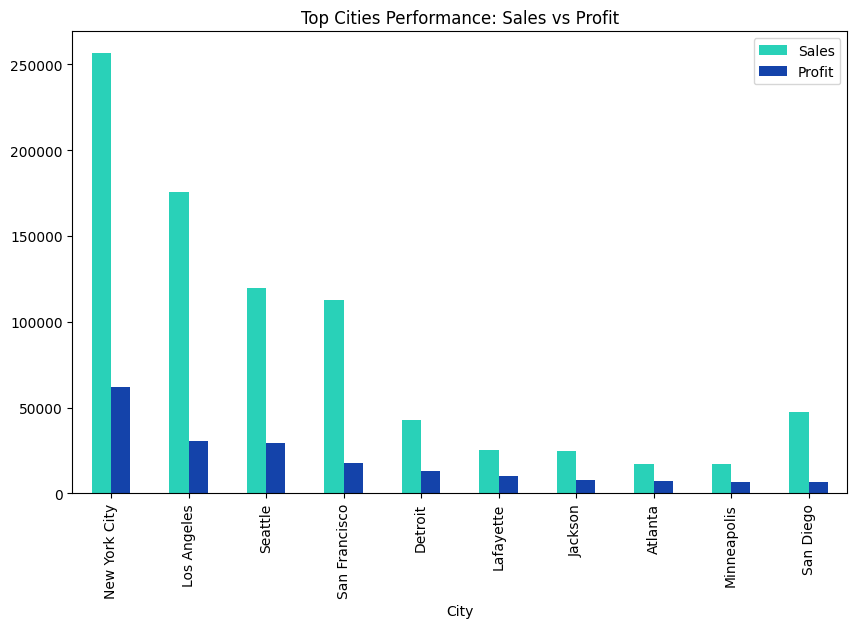

In [ ]:
top_cities=df.groupby("City")[["Sales","Profit"]].sum().sort_values(by="Profit",ascending=False).head(10)

top_cities.plot(kind="bar",figsize=(10,6), color=["#29D1B8","#1443AA"])
plt.title("Top Cities Performance: Sales vs Profit")
plt.xlabel("City")    
plt.show()

Mối tương quan giữa discount và lợi nhuận 

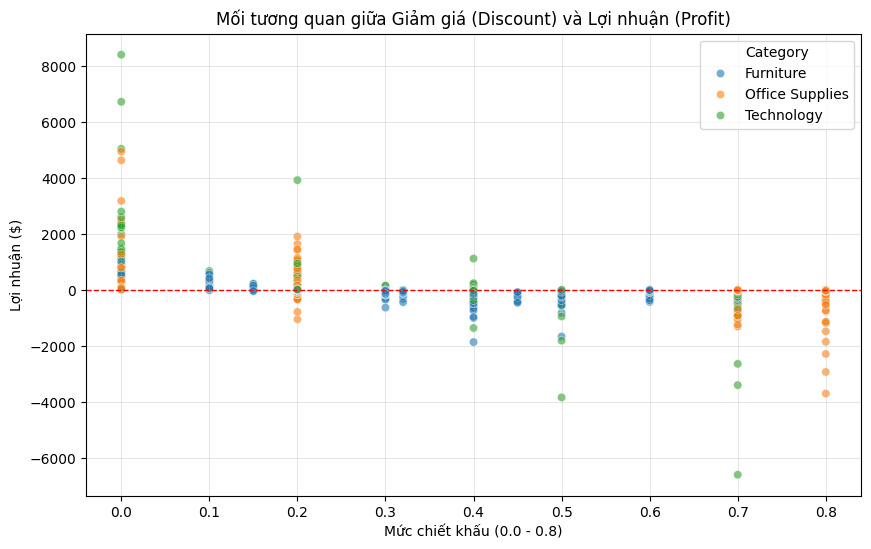

In [ ]:
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán, thêm 'hue' theo Category để thấy sự khác biệt nhóm ngành
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", alpha=0.6)

# Thêm đường kẻ ngang tại mức Profit = 0 để phân định vùng lời/lỗ
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title("Mối tương quan giữa Giảm giá (Discount) và Lợi nhuận (Profit)")
plt.xlabel("Mức chiết khấu (0.0 - 0.8)")
plt.ylabel("Lợi nhuận ($)")
plt.grid(True, alpha=0.3)
plt.show()

- Vùng an toàn (0% - 20%): Đa số các điểm dữ liệu nằm trên đường kẻ đỏ (Profit > 0). Đây là ngưỡng giảm giá lành mạnh giúp kích cầu mà vẫn giữ được lợi nhuận.

- Vùng nguy hiểm (> 20%):  các điểm dữ liệu bắt đầu "rơi tự do" xuống dưới đường kẻ đỏ. Đặc biệt ở mức Discount 0.5 (50%) và 0.7 (70%), lợi nhuận âm cực nặng (các điểm tụ lại phía dưới rất sâu).

Doanh số bán theo Discount

In [ ]:
sub_cat_analyst=df.groupby(["Sub-Category"]).agg(
    {
        "Quantity":"sum",
        "Discount":"mean",
        "Sales":"mean",
         
    }).reset_index()

sub_cat_analyst=sub_cat_analyst.sort_values(by="Quantity",ascending=False)
sub_cat_analyst.style.background_gradient(cmap="PuBu", subset=["Quantity"])\
                     .background_gradient(cmap="YlGn", subset=["Discount"])\
                     .background_gradient(cmap="YlOrBr", subset=["Sales"])
                     


,Sub-Category,Quantity,Discount,Sales
3,Binders,5974,0.372292,133.560560
12,Paper,5178,0.074891,57.284092
9,Furnishings,3563,0.138349,95.825668
13,Phones,3289,0.154556,371.211534
14,Storage,3158,0.074704,264.590553
2,Art,3000,0.074874,34.068834
0,Accessories,2976,0.078452,215.974604
5,Chairs,2356,0.170178,532.332420
1,Appliances,1729,0.166524,230.755710
10,Labels,1400,0.068681,34.303055


Doanh thu theo mỗi danh mục sản phẩm

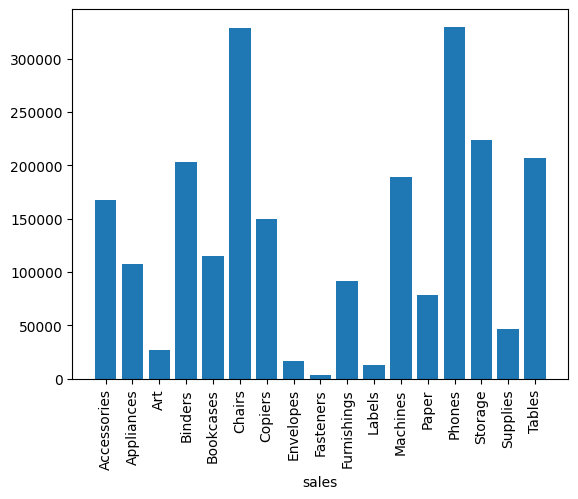

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x=sub_cat,height= sale_value_sub_category)
plt.xticks(sub_cat, rotation='vertical')
plt.xlabel('sales')
plt.show()